In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator



UsageError: unrecognized arguments: # Plots show up in notebook


In [67]:
csv = "1429_1.csv"
df1 = pd.read_csv(csv)
df1.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman


In [68]:
df2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df = df1.append(df2, ignore_index=True)

In [71]:
data = df
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.000000e+01,39131.000000,39627.000000
mean,1.833906e+08,0.589635,4.586116
std,2.458373e+07,12.393038,0.735170
min,1.082112e+08,0.000000,1.000000
25%,1.849055e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981637e+08,0.000000,5.000000
max,2.027812e+08,814.000000,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34660 non-null  object 
 1   name                 27900 non-null  object 
 2   asins                34658 non-null  object 
 3   brand                34660 non-null  object 
 4   categories           34660 non-null  object 
 5   keys                 34660 non-null  object 
 6   manufacturer         34660 non-null  object 
 7   reviews.date         34621 non-null  object 
 8   reviews.dateAdded    24039 non-null  object 
 9   reviews.dateSeen     34660 non-null  object 
 10  reviews.didPurchase  1 non-null      object 
 11  reviews.doRecommend  34066 non-null  object 
 12  reviews.id           1 non-null      float64
 13  reviews.numHelpful   34131 non-null  float64
 14  reviews.rating       34627 non-null  float64
 15  reviews.sourceURLs   34660 non-null 

In [72]:
data.shape

(39660, 18)

In [73]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM',
       'B06XB29FPF', 'B017JG41PC', 'B01AHBBG04', 'B01AHBDCKQ',
       'B01ACEKAJY', 'B018Y224PY'], dtype=object)

In [74]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 51


**Visualizing the distributions of numerical variables:**

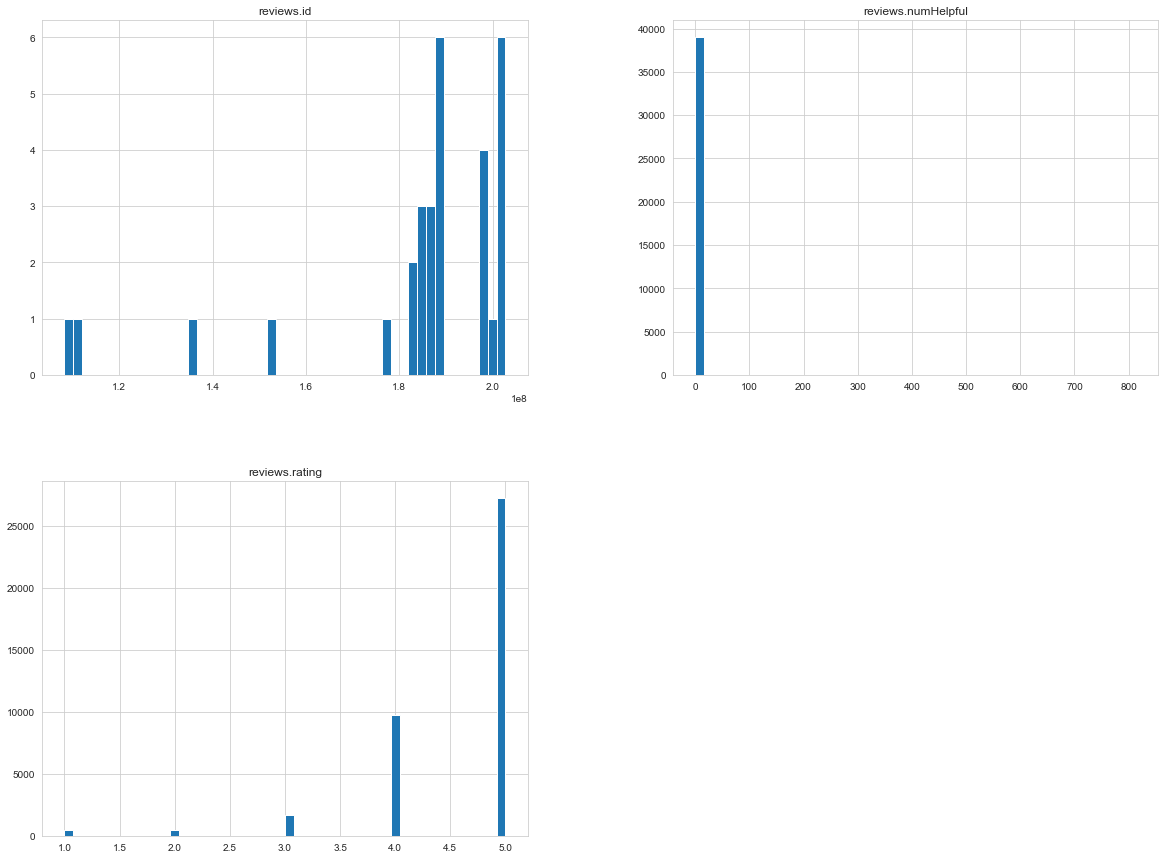

In [75]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

# 3 Split into Train/Test

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 39660
After 39627


In [77]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

**Check to see if train/test sets were stratified proportionately in comparison to raw data.**

In [78]:
len(strat_train)

31701

In [79]:
strat_train["reviews.rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5.0    0.686256
4.0    0.247248
3.0    0.042112
1.0    0.011987
2.0    0.011545
Name: reviews.rating, dtype: float64

In [80]:
len(strat_test)

7926

In [81]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.691395
4.0    0.239465
3.0    0.045420
1.0    0.011734
2.0    0.011229
Name: reviews.rating, dtype: float64

# 4 Data Exploration (Training Set)

In [82]:
reviews = strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
6492,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-04-16T00:00:00.000Z,2017-05-21T01:18:23Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:18:00.000Z",True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,"Got it as a gift for a family member, and it w...",Great choice for price!,QualityOnaBudget
6975,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-11-27T00:00:00.000Z,2017-05-21T01:20:20Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:15:00.000Z",True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Ive only had one tablet before this one so its...,Great for Learners,ShanWow


## 4.1 names / ASINs

In [83]:
len(reviews["name"].unique()), len(reviews["asins"].unique())

(70, 48)

In [84]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31701 entries, 6492 to 19512
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   31674 non-null  object 
 1   name                 26275 non-null  object 
 2   asins                31672 non-null  object 
 3   brand                31674 non-null  object 
 4   categories           31674 non-null  object 
 5   keys                 31674 non-null  object 
 6   manufacturer         31674 non-null  object 
 7   reviews.date         31651 non-null  object 
 8   reviews.dateAdded    20028 non-null  object 
 9   reviews.dateSeen     31674 non-null  object 
 10  reviews.doRecommend  31225 non-null  object 
 11  reviews.id           28 non-null     float64
 12  reviews.numHelpful   31275 non-null  float64
 13  reviews.rating       31674 non-null  float64
 14  reviews.sourceURLs   31674 non-null  object 
 15  reviews.text         31674 non-nu

In [85]:
reviews.groupby("asins")["name"].unique()

asins
B002Y27P6Y                                                           [nan]
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nKin...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B006GWO5NE                                                           [nan]
B006GWO5WK                                                           [nan]
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,, Echo ...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG               [nan, Amazon 9W PowerFast Official OEM USB Cha...
B00QJDU3KY         

<u>Note</u>: there are actually 34 ASINs with one of the product having 2 ASINs

In [86]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Amazon Fire Tv,,,
Amazon Fire Tv,,,
Echo (White),,,
Echo (White),,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
nan
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Coconut Water Red Tea 16.5 Oz (pack of 12),,,
Amazon Fire Tv,,,
Amazon Kindle Fire 5

In [87]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2347
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2034
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           248
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           107
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

**Confirmed our hypothesis that each ASIN can have multiple names. Therefore we should only really concern ourselves with which ASINs do well, not the product names.**

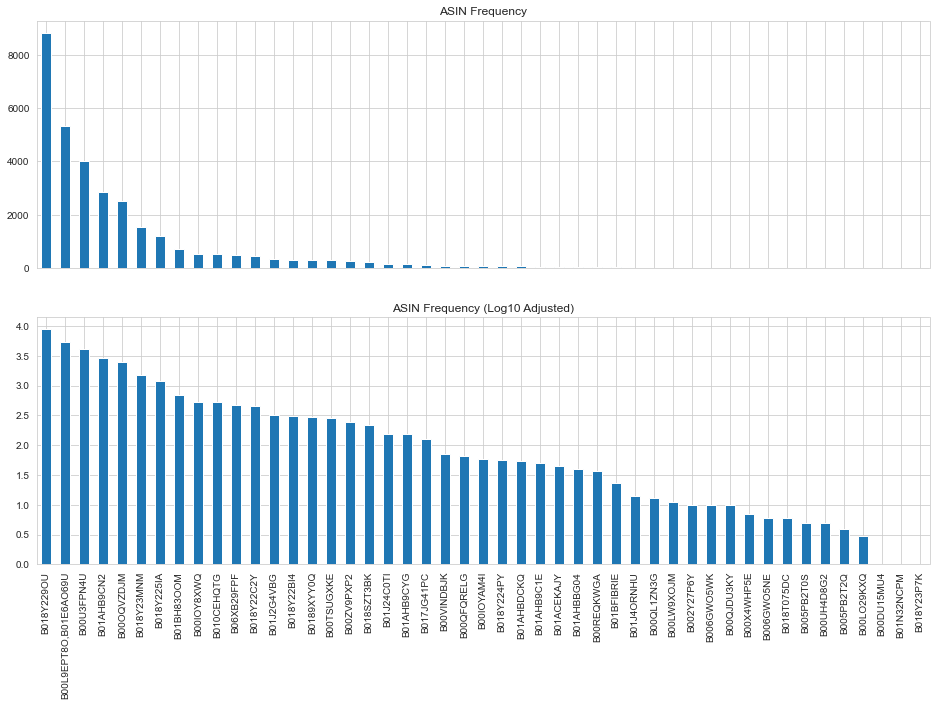

In [88]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [89]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.5855907053103495

## 4.2 reviews.rating / ASINs

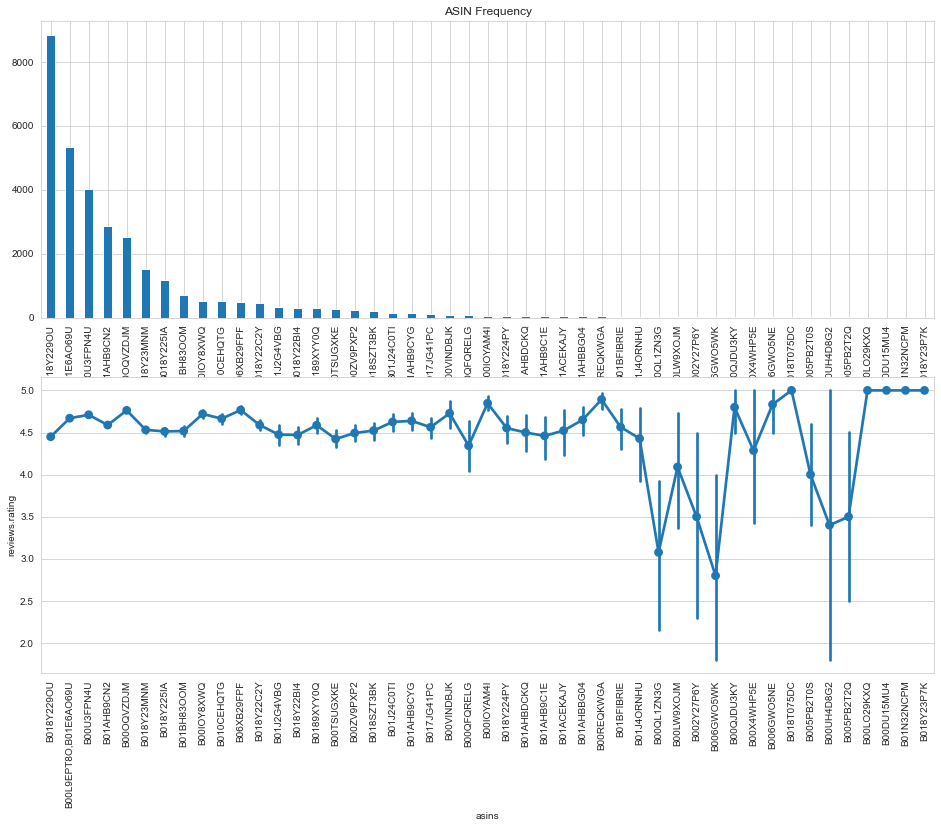

In [90]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

## 4.3 reviews.doRecommend / ASINs

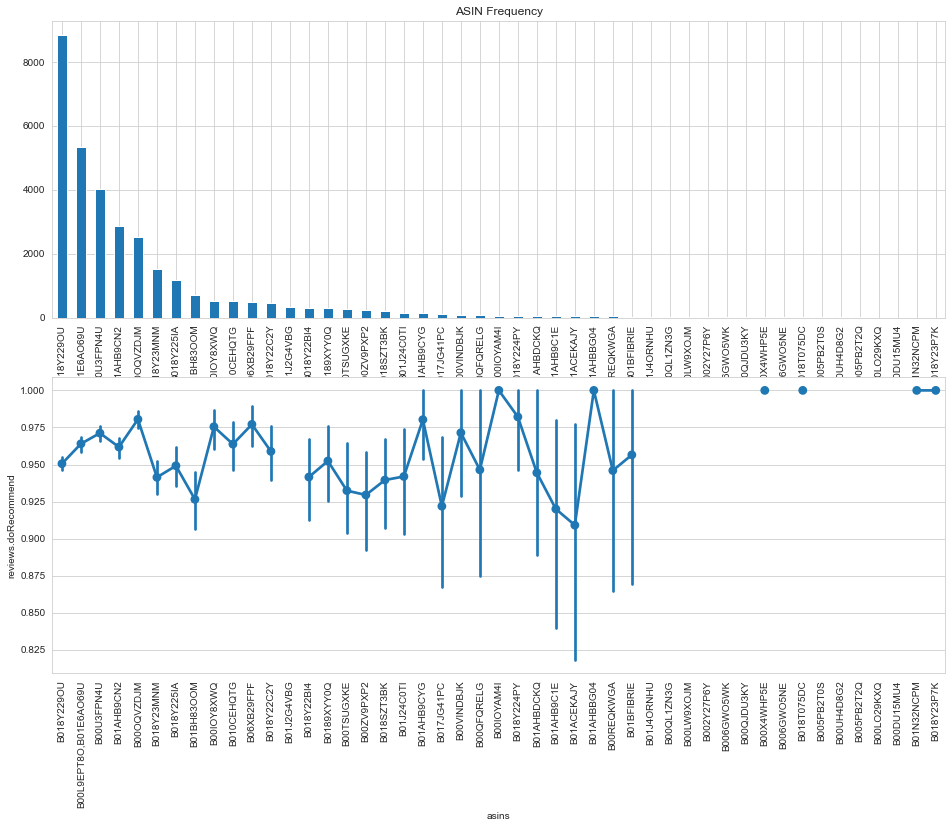

In [91]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

# 5 Correlations

In [92]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating
reviews.id,1.000000,-0.654363,0.616446
reviews.numHelpful,-0.654363,1.000000,-0.040975
reviews.rating,0.616446,-0.040975,1.000000


In [93]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31701 entries, 6492 to 19512
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   31674 non-null  object 
 1   name                 26275 non-null  object 
 2   asins                31672 non-null  object 
 3   brand                31674 non-null  object 
 4   categories           31674 non-null  object 
 5   keys                 31674 non-null  object 
 6   manufacturer         31674 non-null  object 
 7   reviews.date         31651 non-null  object 
 8   reviews.dateAdded    20028 non-null  object 
 9   reviews.dateSeen     31674 non-null  object 
 10  reviews.doRecommend  31225 non-null  object 
 11  reviews.id           28 non-null     float64
 12  reviews.numHelpful   31275 non-null  float64
 13  reviews.rating       31674 non-null  float64
 14  reviews.sourceURLs   31674 non-null  object 
 15  reviews.text         31674 non-nu

In [94]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8838
"B00L9EPT8O,B01E6AO69U",5344
B00U3FPN4U,4028
B01AHB9CN2,2853
B00OQVZDJM,2513


In [95]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B002Y27P6Y,3.500000
B005PB2T0S,4.000000
B005PB2T2Q,3.500000
B006GWO5NE,4.833333
B006GWO5WK,2.800000


In [96]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8838,4.450441
"B00L9EPT8O,B01E6AO69U",5344,4.669723
B00U3FPN4U,4028,4.710030
B01AHB9CN2,2853,4.588503
B00OQVZDJM,2513,4.762833
B018Y23MNM,1518,4.531621
B018Y225IA,1180,4.512712
B01BH83OOM,697,4.517934
B00IOY8XWQ,530,4.720755
B010CEHQTG,524,4.664122


,asins,reviews.rating
asins,1.00000,0.10175
reviews.rating,0.10175,1.00000


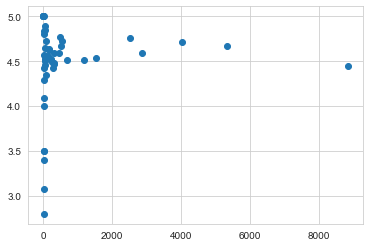

In [97]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

## 6.1 Set Target Variable (Sentiments)

Segregate ratings from 1-5 into positive, neutral, and negative.

In [98]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

6492     Positive
6975     Positive
10628    Positive
794      Positive
26837    Positive
32256    Positive
21611    Positive
6201     Positive
7218     Positive
30343    Positive
7697     Positive
37407    Positive
2091     Positive
31771    Positive
35477    Positive
15923    Positive
11342    Positive
24343    Positive
38498    Positive
31981    Positive
Name: Sentiment, dtype: object

In [99]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

31701 7926


## 6.2 Extract Features

In [100]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(31701, 13013)

In [101]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(31701, 13013)

## 6.3 Building a Pipeline from the Extracted Features

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

## 6.4 Test Model

In [103]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9307342922028766

## 6.5 Testing Other Models

**Logistic Regression Classifier**

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9367903103709311

**Support Vector Machine Classifier**

In [105]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9379258137774413

**Decision Tree Classifier**

In [106]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.9157204138279081

**Random Forest Classifier**

In [107]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.941332323996972

the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.

## 6.6 Fine tuning the Support Vector Machine Classifier

In [108]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.","The tablet is ok.", "The book is not good."] 

gs_clf_LinearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [109]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9462528387585163

## 6.7 Detailed Performance Analysis of Support Vector Machine Classifier

In [49]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9372224317965777
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         6
    Negative       0.73      0.24      0.36       173
     Neutral       0.47      0.09      0.16       290
    Positive       0.94      1.00      0.97      6457

    accuracy                           0.94      6926
   macro avg       0.54      0.33      0.37      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9383482529598614


In [51]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    6],
       [   0,   41,   11,  121],
       [   0,    8,   27,  255],
       [   0,    7,   19, 6431]], dtype=int64)

In [52]:
import pickle
with open('linear_svm_classifier.pkl','wb') as data:
    pickle.dump(gs_clf_LinearSVC_pipe, data)